# Задание

Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).

С помощью полученной модели предсказать цены для квартир из файла test.csv.

Метрика:

R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Целевая переменная:

Price


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats


# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

## Загрузка данных

In [12]:
train = pd.read_csv('train.csv')
train.shape
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [13]:
test = pd.read_csv('test.csv')
test.shape
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [14]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Подготовка датасета

In [15]:
print(train['Ecology_2'].value_counts())
print(train['Ecology_3'].value_counts())
print(train['Shops_2'].value_counts())

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


Преобразуем признаки A->0, B->1

In [16]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
train['Shops_2_bin'] = train['Shops_2'].replace({'A':0, 'B':1})

Обработка Rooms, удаляем не информативные значения

In [17]:
print(train['Rooms'].value_counts())

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64


In [18]:
train = train[train['Rooms'].map(lambda x: x<6 and x>0)]
print(train['Rooms'].value_counts())

2.0    3880
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64


In [19]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,9988.000000,9988.000000,9988.000000,9988.000000,7878.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,5198.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8384.648278,50.419003,1.888266,56.295899,37.167515,6.276632,8.526632,12.615839,3.992567e+03,0.118849,24.688226,5352.479375,8.048058,1143.192382,1.319684,4.232379,214155.733452,0.990288,0.972467,0.917401
std,4859.105242,43.598629,0.811534,20.984196,86.257886,28.577525,5.239378,6.772128,2.006207e+05,0.119065,17.523467,4005.068683,23.844795,1021.756255,1.493427,4.806454,92892.529960,0.098073,0.163639,0.275289
min,0.000000,0.000000,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,4170.750000,20.000000,1.000000,41.773051,22.772654,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000
50%,8395.500000,36.000000,2.000000,52.509275,32.769898,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192255.017896,1.000000,1.000000,1.000000
75%,12592.500000,75.000000,2.000000,65.894295,45.126159,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000
max,16798.000000,209.000000,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


In [20]:
train = train[train['Rooms'].map(lambda x: x<6 and x>0)]


Обработка выбросов установив в места выброса медиану

In [21]:
lifesq_med = train['LifeSquare'].median()
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = lifesq_med
train.loc[train['LifeSquare'] < 10, 'LifeSquare'] = lifesq_med
train.loc[train['LifeSquare'] > 400, 'LifeSquare'] = lifesq_med

In [22]:
kitchsq_med = train['KitchenSquare'].median()
train.loc[train['KitchenSquare'] < 5, 'KitchenSquare'] = kitchsq_med
train.loc[train['KitchenSquare'] > 80, 'KitchenSquare'] = kitchsq_med

In [23]:
square_med = train['Square'].median()
train.loc[train['Square'] < 16, 'Square'] = square_med
train.loc[train['Square'] > 400, 'Square'] = square_med

In [24]:
hfloor_med = train['HouseFloor'].median()
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = hfloor_med

In [25]:
train.loc[train['HouseYear'] > 2021, 'HouseYear'] = 2021
ind = train[train['Floor'] > train['HouseFloor']].index
train.loc[ind, 'Floor'] = train.loc[ind, 'HouseFloor']

Добавляем новые признаки "стоимость квадратного метра в зависимости от района" и "стоимость квадратного метра в зависимости от возраста дома"

In [26]:
train['m_2_Price'] = train['Price'] / train['Square']
m_2_MedPriceByDistrict = train.groupby(['DistrictId'], as_index=False).agg({'m_2_Price':'median'}).rename(columns={'m_2_Price':'m_2_MedPriceByDistrict'})
m_2_MedPriceByHouseYear = train.groupby(['HouseYear'], as_index=False).agg({'m_2_Price':'median'}).rename(columns={'m_2_Price':'m_2_MedPriceByHouseYear'})

In [27]:
train = train.merge(m_2_MedPriceByDistrict, on=['DistrictId'], how='left')
train = train.merge(m_2_MedPriceByHouseYear, on=['HouseYear'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_Price,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,3854.958571,4358.274853,4474.994692
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,4567.491245,4437.304072,4317.685445
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,4915.149522,4845.919064,4429.204254
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,3291.591637,2949.975415,2901.478487
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,3788.892642,3994.531770,4367.263383


In [28]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_Price,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,...,5198.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8384.648278,50.419003,1.888266,56.203451,35.949295,7.491189,7.917901,12.960753,1984.863636,0.118849,...,1143.192382,1.319684,4.232379,214155.733452,0.990288,0.972467,0.917401,3892.846032,3928.323986,3781.339156
std,4859.105242,43.598629,0.811534,18.981381,15.245407,3.291885,5.184671,6.443869,18.416529,0.119065,...,1021.756255,1.493427,4.806454,92892.529960,0.098073,0.163639,0.275289,1251.448992,997.435127,763.067690
min,0.000000,0.000000,1.000000,16.117154,10.523868,5.000000,1.000000,1.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,752.588644,2273.498737,2764.147132
25%,4170.750000,20.000000,1.000000,41.794218,27.648769,6.000000,4.000000,9.000000,1974.000000,0.017647,...,350.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000,2919.860059,2938.048239,2901.478487
50%,8395.500000,36.000000,2.000000,52.509275,32.769898,6.000000,7.000000,13.000000,1977.000000,0.075424,...,900.000000,1.000000,3.000000,192255.017896,1.000000,1.000000,1.000000,3909.165190,4134.353749,4285.794408
75%,12592.500000,75.000000,2.000000,65.889256,41.415441,9.000000,11.000000,17.000000,2001.000000,0.195781,...,1548.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000,4690.853491,4562.026777,4409.376396
max,16798.000000,209.000000,5.000000,275.645284,263.542020,78.000000,42.000000,117.000000,2021.000000,0.521867,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,11854.652892,8700.768533,7823.822055


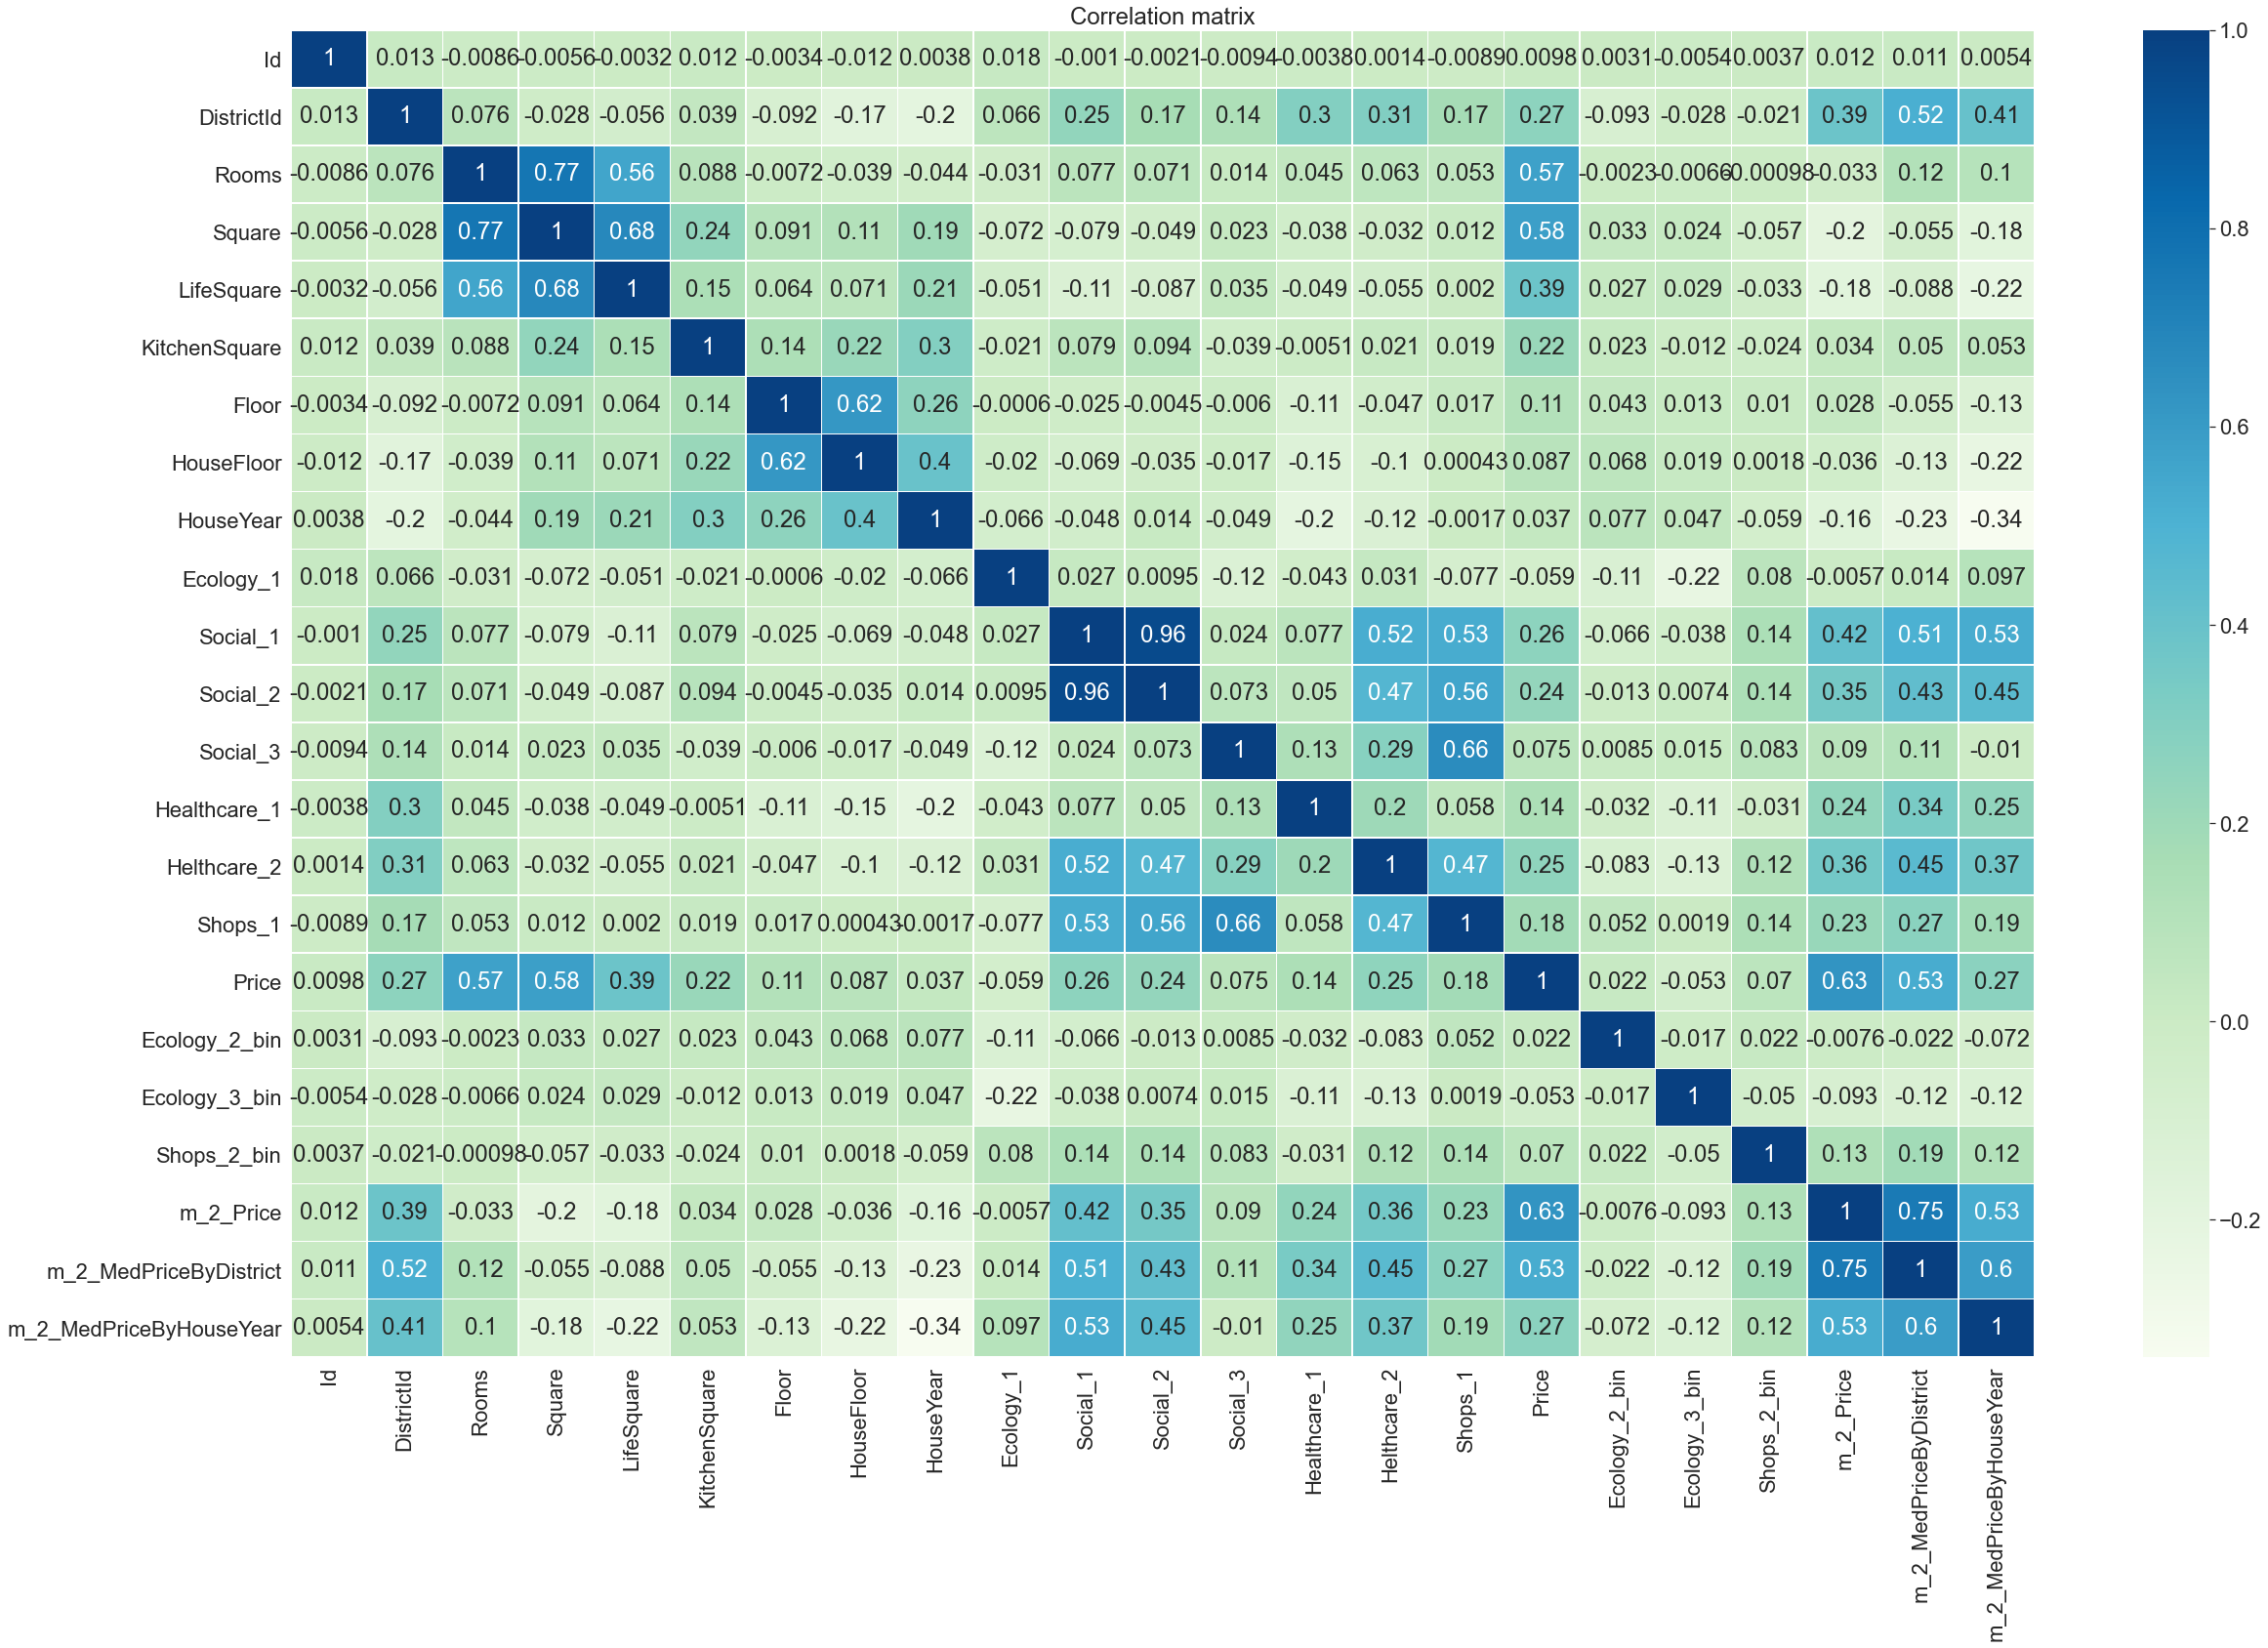

In [29]:
plt.figure(figsize = (40,25))

sns.set(font_scale=2)
sns.heatmap(train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Выбираем признаки для модели

In [30]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'm_2_MedPriceByDistrict', 'm_2_MedPriceByHouseYear', 
                 'Ecology_1','Social_1', 'Social_3', 'Helthcare_2', 'Shops_1', 
                 'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin',]
target_name = 'Price'

In [31]:
df = train[feature_names + [target_name]]
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,4358.274853,4474.994692,0.089040,33,5,0,11,1,1,1,184966.930730
1,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,4437.304072,4317.685445,0.000070,46,1,1,16,1,1,1,300009.450063
2,2.0,44.947953,29.197612,6.0,8.0,12.0,1968,4845.919064,4429.204254,0.049637,34,0,1,3,1,1,1,220925.908524
3,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,2949.975415,2901.478487,0.437885,23,3,0,5,1,1,1,175616.227217
4,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,3994.531770,4367.263383,0.012339,35,1,2,4,1,1,1,150226.531644


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names])

In [34]:
df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)
df.head()

C:\Users\Zalut\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,0.137690,-0.433177,-0.426809,-0.453012,-0.177050,-0.614685,-0.861423,0.431078,0.909081,-0.250376,0.474346,-0.127835,-0.883705,1.408098,0.09903,0.168263,0.30006,184966.930730
1,1.369986,0.499472,0.268963,0.154573,-0.177050,-0.614685,-0.372708,0.510314,0.702917,-0.997650,1.216246,-0.295595,-0.214071,2.448419,0.09903,0.168263,0.30006,300009.450063
2,0.137690,-0.593005,-0.442889,-0.453012,0.015836,-0.149103,-0.915725,0.920001,0.849070,-0.581325,0.531415,-0.337535,-0.214071,-0.256414,0.09903,0.168263,0.30006,220925.908524
3,0.137690,-0.150179,1.100860,0.458365,0.015836,0.626867,-0.427009,-0.980913,-1.153115,2.679648,-0.096346,-0.211715,-0.883705,0.159714,0.09903,0.168263,0.30006,175616.227217
4,-1.094607,-0.872175,-0.798518,-0.149220,0.594493,-0.149103,-0.481311,0.066381,0.767892,-0.894602,0.588485,-0.295595,0.455563,-0.048350,0.09903,0.168263,0.30006,150226.531644


In [35]:
from sklearn.model_selection import train_test_split

Разбиваем на обучающую и валидационную выборку

In [36]:
X = df[feature_names]
y = df[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.67, shuffle=True, random_state=42)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

Строим и обучаем модель

In [38]:
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [39]:
from sklearn.metrics import r2_score as r2

In [40]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
        
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.show()

R2:	0.911


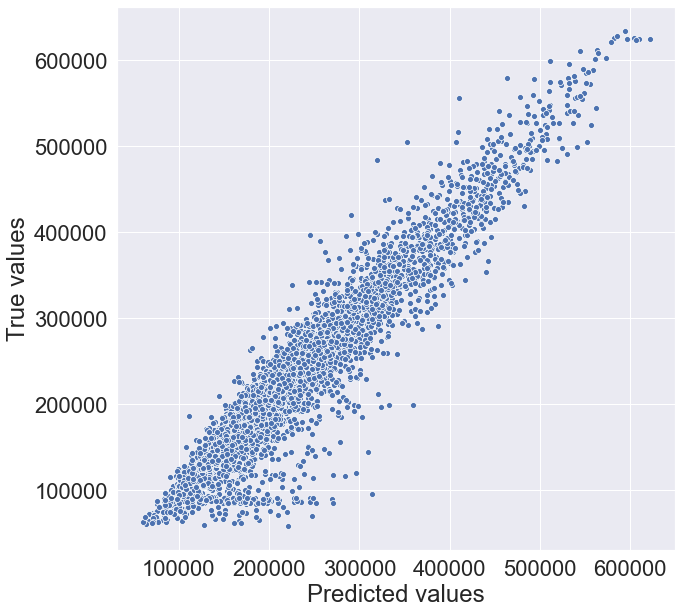

In [41]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

Проверка на валидационной выборке

R2:	0.761


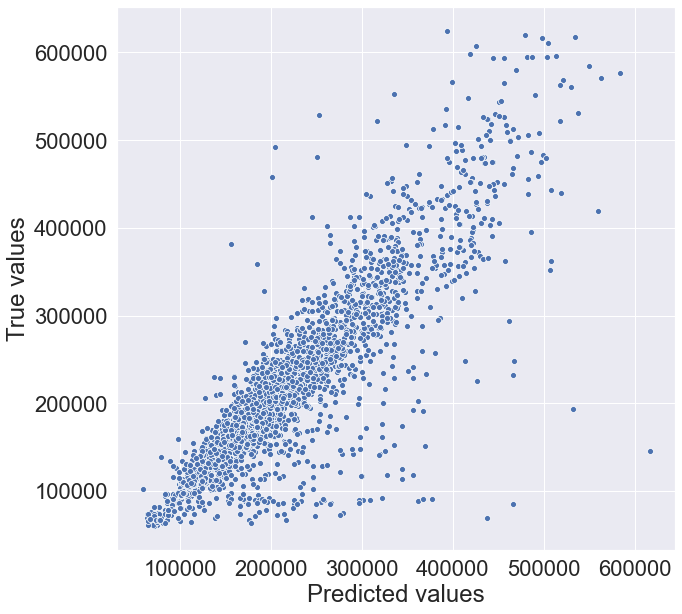

In [42]:
y_valid_preds = gb_model.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

Важность признаков

In [43]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.446368
7,m_2_MedPriceByDistrict,0.367721
8,m_2_MedPriceByHouseYear,0.030722
0,Rooms,0.023946
2,LifeSquare,0.021394
10,Social_1,0.018418
5,HouseFloor,0.016573
9,Ecology_1,0.013934
4,Floor,0.013520
3,KitchenSquare,0.012742


Подготовка тестового датасета

In [44]:

test_df = test.drop('Healthcare_1', axis=1)
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [45]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = lifesq_med
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = lifesq_med
test_df.loc[test_df['LifeSquare'] > 200, 'LifeSquare'] = lifesq_med
test_df.loc[test_df['KitchenSquare'] < 5, 'KitchenSquare'] = kitchsq_med
test_df.loc[test_df['KitchenSquare'] > 80, 'KitchenSquare'] = kitchsq_med
test_df.loc[test_df['Square'] < 16, 'Square'] = square_med
test_df.loc[test_df['Square'] > 400, 'Square'] = square_med
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = hfloor_med
ind = test_df[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[ind, 'Floor'] = test_df.loc[ind, 'HouseFloor']

Добавляем новые признаки к датасету

In [46]:
test_df = test_df.merge(m_2_MedPriceByDistrict, on=['DistrictId'], how='left')
test_df = test_df.merge(m_2_MedPriceByHouseYear, on=['HouseYear'], how='left')

In [47]:
test_df.loc[test_df['m_2_MedPriceByDistrict'].isnull(), 'm_2_MedPriceByDistrict'] =m_2_MedPriceByDistrict['m_2_MedPriceByDistrict'].median()
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] < 1950), 'm_2_MedPriceByHouseYear'] = m_2_MedPriceByHouseYear.loc[m_2_MedPriceByHouseYear['HouseYear'] < 1950,'m_2_MedPriceByHouseYear'].median()

In [48]:
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] >= 1990), 'm_2_MedPriceByHouseYear'] = m_2_MedPriceByHouseYear.loc[m_2_MedPriceByHouseYear['HouseYear'] >= 1990,
'm_2_MedPriceByHouseYear'].median()

In [49]:
test_df.loc[(test_df['m_2_MedPriceByHouseYear'].isnull()) & (test_df['HouseYear'] >= 1950) &(test_df['HouseYear'] < 1990), 'm_2_MedPriceByHouseYear'] = m_2_MedPriceByHouseYear.loc[(m_2_MedPriceByHouseYear['HouseYear'] >= 1950) & (m_2_MedPriceByHouseYear['HouseYear'] < 1990), 'm_2_MedPriceByHouseYear'].median()

In [50]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.543741,36.044846,7.425800,8.054000,12.941600,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.990400,0.970200,0.917600,3947.076606,3790.946747
std,4832.674037,44.179466,0.838594,18.955345,14.707446,3.038674,5.337076,6.466881,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.097518,0.170052,0.275001,985.346771,761.491938
min,1.000000,0.000000,0.000000,16.319015,10.692499,5.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2273.498737,2801.198909
25%,4221.750000,21.000000,1.000000,41.951045,27.990919,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,2949.975415,2901.478487
50%,8320.500000,37.000000,2.000000,52.921340,32.769898,6.000000,7.000000,13.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000,1.000000,1.000000,4158.187979,4285.794408
75%,12598.250000,77.000000,2.000000,66.285129,41.760597,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000,1.000000,1.000000,4571.660177,4409.376396
max,16795.000000,212.000000,17.000000,223.453689,169.901701,65.000000,46.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000,8700.768533,7823.822055


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9987
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9988 non-null   int64  
 1   DistrictId               9988 non-null   int64  
 2   Rooms                    9988 non-null   float64
 3   Square                   9988 non-null   float64
 4   LifeSquare               9988 non-null   float64
 5   KitchenSquare            9988 non-null   float64
 6   Floor                    9988 non-null   float64
 7   HouseFloor               9988 non-null   float64
 8   HouseYear                9988 non-null   int64  
 9   Ecology_1                9988 non-null   float64
 10  Ecology_2                9988 non-null   object 
 11  Ecology_3                9988 non-null   object 
 12  Social_1                 9988 non-null   int64  
 13  Social_2                 9988 non-null   int64  
 14  Social_3                

In [52]:
stand_features = scaler.fit_transform(test_df[feature_names])
test_df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)

Предсказываем цены

In [53]:
X_test = test_df[feature_names]
X_test

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,m_2_MedPriceByDistrict,m_2_MedPriceByHouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,0.107333,-0.351445,-0.177619,-0.469265,-0.384893,0.163681,-0.667299,-1.012030,0.649905,1.585280,-0.794834,-0.304366,-0.891612,-0.888194,0.098453,0.175258,0.299666
1,0.107333,0.671089,-0.222695,-0.469265,-1.321830,-1.846763,-0.398066,-0.637158,-1.168177,-0.367283,-1.080052,-0.220549,-0.891612,-0.469511,0.098453,0.175258,0.299666
2,-1.085258,-0.212862,-1.366560,1.505478,-1.134442,-1.228165,-4.059632,4.768437,2.275479,-0.998468,0.288994,3.299785,2.487242,0.158513,0.098453,0.175258,0.299666
3,0.107333,0.870705,1.080921,0.518107,2.613303,1.400877,1.217331,0.238404,0.802030,-0.149940,-0.110311,-0.220549,1.135700,-0.260169,0.098453,0.175258,0.299666
4,-1.085258,-0.475725,0.499302,-0.469265,1.676366,0.627630,1.755796,-1.204024,-0.972574,-0.397445,-1.308227,-0.304366,-0.891612,-0.888194,0.098453,0.175258,-3.337053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.299924,0.558746,1.004010,-0.469265,-0.572281,-0.609567,-0.613452,0.190081,0.735872,-0.997055,0.631256,-0.346275,-0.215841,-0.678852,0.098453,0.175258,0.299666
4996,-1.085258,-0.862390,-0.968163,0.847230,0.739430,0.627630,1.755796,-0.705463,-0.972574,-0.939144,-1.365270,-0.346275,-0.891612,-0.678852,0.098453,0.175258,0.299666
4997,1.299924,1.123724,0.832164,0.518107,2.613303,1.400877,0.248093,0.218385,0.521591,-0.242173,2.798913,-0.262458,2.487242,2.251927,0.098453,0.175258,0.299666
4998,0.107333,1.306437,-0.222695,-0.469265,-0.759668,0.009032,-0.398066,-1.353824,-1.168177,-0.397445,-1.308227,-0.304366,-0.891612,-0.888194,0.098453,0.175258,-3.337053


In [54]:
y_test_preds = gb_model.predict(X_test)

In [55]:
test_df['Price'] = y_test_preds

In [62]:


test_df.to_csv("Zalutskii_Ivan_predictions.csv", columns=['Id', 'Price'], index=False, encoding='utf-8')

